# Import Required Packages

In [1]:
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils
import matplotlib.pyplot as plt
from openpyxl import *
from tkinter import *
import xlsxwriter
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.optimizers import SGD, Adam
from keras.optimizers import gradient_descent_v2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tqdm import tqdm_notebook
from sklearn.utils import shuffle
from tkinter import *
from tkinter.ttk import *
from tkinter.filedialog import askopenfile 
import time
import openpyxl

Loading Numbers Data set....

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

Training Numbers Dataset....

In [3]:
modelnum = Sequential()

modelnum.add(Conv2D(64,(3,3), input_shape = x_trainr.shape[1:]))
modelnum.add(Activation("relu"))
modelnum.add(MaxPooling2D(pool_size=(2,2)))

modelnum.add(Conv2D(64,(3,3)))
modelnum.add(Activation("relu"))
modelnum.add(MaxPooling2D(pool_size=(2,2)))
          
modelnum.add(Conv2D(64,(3,3)))
modelnum.add(Activation("relu"))
modelnum.add(MaxPooling2D(pool_size=(2,2)))
          
modelnum.add(Flatten())
modelnum.add(Dense(64))
modelnum.add(Activation("relu"))
          
modelnum.add(Dense(32))
modelnum.add(Activation("relu"))
          
modelnum.add(Dense(10))
modelnum.add(Activation("softmax"))

In [4]:
modelnum.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [5]:
modelnum.fit(x_trainr, y_train, batch_size=None,epochs=3, verbose=1, validation_split=0.3)

Epoch 1/3
1313/1313 [==============================] - 56s 42ms/step - loss: 0.3175 - accuracy: 0.9007 - val_loss: 0.1142 - val_accuracy: 0.9638
Epoch 2/3
1313/1313 [==============================] - 58s 44ms/step - loss: 0.0952 - accuracy: 0.9714 - val_loss: 0.0898 - val_accuracy: 0.9726
Epoch 3/3
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0677 - accuracy: 0.9796 - val_loss: 0.0660 - val_accuracy: 0.9801


In [6]:
test_loss, test_acc=modelnum.evaluate(x_testr, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0582 - accuracy: 0.9832


Loading Characters Dataset....

In [7]:
data = pd.read_csv(r"C:\Users\GREESHMANTH\Desktop\final epics\Data\A_Z Handwritten Data.csv").astype('float32')

In [8]:
# Split data the X - Our data , and y - the predict label
X = data.drop('0',axis = 1)
y = data['0']


# Reshaping the data in csv file so that it can be displayed as an image...

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

# Dictionary for getting characters from index values...
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}
train_yint = np.int0(y)
count = np.zeros(26, dtype='int')
for i in train_yint:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)
#Reshaping the training & test dataset so that it can be put in the model...

train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)

# Converting the labels to categorical values...

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')

test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')



Training Characters Dataset.....

In [9]:
modelcharac = Sequential()

modelcharac.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
modelcharac.add(MaxPooling2D(pool_size=(2, 2), strides=2))

modelcharac.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
modelcharac.add(MaxPooling2D(pool_size=(2, 2), strides=2))

modelcharac.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
modelcharac.add(MaxPooling2D(pool_size=(2, 2), strides=2))

modelcharac.add(Flatten())

modelcharac.add(Dense(64,activation ="relu"))
modelcharac.add(Dense(128,activation ="relu"))

modelcharac.add(Dense(26,activation ="softmax"))


In [10]:
modelcharac.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
history = modelcharac.fit(train_X, train_yOHE, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_yOHE))

9312/9312 [==============================] - 295s 32ms/step - loss: 0.1634 - accuracy: 0.9559 - val_loss: 0.0678 - val_accuracy: 0.9809 - lr: 0.0010


In [12]:
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

Number Prediction

In [41]:
def pred(model,data): 
    global kernel
    s=""
    for i in data:
        if np.sum(i == 0)/np.sum(i== 255)<0.002:
            s+=" "
            if len(s)>1 and s[-1]==s[-2]:
                s=s[:-1]
        else:
            ss=cv2.resize(i,(28,28),interpolation=cv2.INTER_AREA)
            ss = cv2.filter2D(src=ss, ddepth=-1, kernel=kernel)
            ss = cv2.threshold(ss, 155, 355, cv2.THRESH_BINARY_INV)[1]
            ss=tf.keras.utils.normalize(ss,axis=1)
            ss=np.array(ss).reshape(-1,IMG_SIZE,IMG_SIZE,1)
            pred=model.predict(ss)
            #print(np.argmax(pred))
            s+=str(np.argmax(pred))
    return s

Character Prediction

In [2]:
def charpred(modelcharac,data):
    global kernel
    s=""
    for i in data:
        if np.sum(i == 0)/np.sum(i== 255)<0.002:
            s+=" "
            if len(s)>1 and s[-1]==s[-2]:
                s=s[:-1]
        else:
            img_copy = i.copy()
            img = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
            img = cv2.resize(i, (400,440))
            img_copy = cv2.filter2D(src=i, ddepth=-1, kernel=kernel)
            #img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
            _, img_thresh = cv2.threshold(img_copy, 100, 255, cv2.THRESH_BINARY_INV)
            img_final = cv2.resize(img_thresh, (28,28),interpolation=cv2.INTER_AREA)
            img_final =np.reshape(img_final, (1,28,28,1))
            img_pred = word_dict[np.argmax(modelcharac.predict(img_final))]
            s+=str(img_pred)
    return s

In [3]:
def order_points(pts):
    # initialzie a list of coordinates that will be ordered
    # such that the first entry in the list is the top-left,
    # the second entry is the top-right, the third is the
    # bottom-right, and the fourth is the bottom-left
    rect = np.zeros((4, 2), dtype = "float32")

    # the top-left point will have the smallest sum, whereas
    # the bottom-right point will have the largest sum
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # now, compute the difference between the points, the
    # top-right point will have the smallest difference,
    # whereas the bottom-left will have the largest difference
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # return the ordered coordinates
    return rect

In [42]:
def four_point_transform(image, pts):
    # obtain a consistent order of the points and unpack them
    # individually
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee1.jpg', image)
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image, which will be the
    # maximum distance between bottom-right and bottom-left
    # x-coordiates or the top-right and top-left x-coordinates
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA),   int(widthB))

    # compute the height of the new image, which will be the
    # maximum distance between the top-right and bottom-right
    # y-coordinates or the top-left and bottom-left y-coordinates
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # now that we have the dimensions of the new image, construct
    # the set of destination points to obtain a "birds eye view",
    # (i.e. top-down view) of the image, again specifying points
    # in the top-left, top-right, bottom-right, and bottom-left
    # order
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee2.jpg', M)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee3.jpg', warped)
    return warped

In [5]:
def excel(d):
    wb = openpyxl.load_workbook(r"C:\Users\GREESHMANTH\Desktop\final epics\book1.xlsx")
    sh1 = wb['Sheet1']
    sh1.cell(row = 1,column = 1,value = 'DAY')
    sh1.cell(row = 1,column = 2,value = 'MONTH')
    sh1.cell(row = 1,column = 3,value = 'YEAR')
    sh1.cell(row = 1,column = 4,value = 'AADHAR')
    sh1.cell(row = 1,column = 5,value = 'NAME')
    sh1.cell(row = 1,column = 6,value = 'C/O')
    sh1.cell(row = 1,column = 7,value = 'HOUSE NUMBER')
    sh1.cell(row = 1,column = 8,value = 'STREET')
    sh1.cell(row = 1,column = 9,value = 'LANDMARK')
    sh1.cell(row = 1,column = 10,value = 'LOCALITY')
    sh1.cell(row = 1,column = 11,value = 'VILLAGE')
    sh1.cell(row = 1,column = 12,value = 'POSTOFFICE')
    sh1.cell(row = 1,column = 13,value = 'DISTRICT')
    sh1.cell(row = 1,column = 14,value = 'STATE')
    sh1.cell(row = 1,column = 15,value = 'PINCODE')
    sh1.cell(row = 1,column = 16,value = 'DOB')
    sh1.cell(row = 1,column = 17,value = 'CONTACT')
    sh1.append((d["date"], d["month"],d["year"],d["aadhar"],d["name"],d["co"],d["doorno"],d["street"],d["landmark"],d["area"],d["city"],d["postoffice"],d["district"],d["state"],d["pincode"], d["dobdate"]+d["dobmonth"]+d["dobyear"], d["contact"]))
    wb.save(r"C:\Users\GREESHMANTH\Desktop\final epics\book1.xlsx")
    return 

In [6]:
def finalstep():
    lst.sort()
    lst.sort(key = lambda x: x[1])
    global d
    d={}
    for i in range(len(lst)):
        x,y,w,h=lst[i]
        
        if i==0:
            sap=res_final[y:y+h,x:x+w].copy()
            date=[]
            h=((w+1)//2)
            for j in range(2):
                date.append(sap[5:-8,3+j*h:(j+1)*h-5])

            d["date"]=pred(modelnum,date)
            
        elif i==1:
            sap=res_final[y:y+h,x:x+w].copy()
            month=[]
            h=(w+1)//2
            for j in range(2):
                month.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["month"]=pred(modelnum,month)
            
        elif i==2:
            sap=res_final[y:y+h,x:x+w].copy()
            year=[]
            h=(w+1)//4
            for j in range(4):
                year.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["year"]=pred(modelnum,year)
            
        elif i==3:
            sap=res_final[y:y+h,x:x+w].copy()
            aadhar=[]
            h=(w+1)//12
            for j in range(12):
                aadhar.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["aadhar"]=pred(modelnum,aadhar)
            
        elif i==4:
            sap=res_final[y:y+h,x:x+w].copy()
            name=[]
            h=(w+1)//20
            for j in range(20):
                name.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["name"]=charpred(modelcharac,name)
            
        elif i==5:
            sap=res_final[y:y+h,x:x+w].copy()
            name=[]
            h=(w+1)//20
            for j in range(20):
                name.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["name"]+=charpred(modelcharac,name)
            
        elif i==6:
            sap=res_final[y:y+h,x:x+w].copy()
            co=[]
            h=(w+1)//20
            for j in range(20):
                co.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["co"]=charpred(modelcharac,co)
            
        elif i==7:
            sap=res_final[y:y+h,x:x+w].copy()
            doorno=[]
            h=(w+1)//20
            for j in range(20):
                doorno.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["doorno"]=pred(modelnum,doorno)
            
        elif i==8:
            sap=res_final[y:y+h,x:x+w].copy()
            street=[]
            h=(w+1)//20
            for j in range(20):
                street.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["street"]=charpred(modelcharac,street)
            
        elif i==9:
            sap=res_final[y:y+h,x:x+w].copy()
            landmark=[]
            h=(w+1)//20
            for j in range(20):
                landmark.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["landmark"]=charpred(modelcharac,landmark)
            
        elif i==10:
            sap=res_final[y:y+h,x:x+w].copy()
            area=[]
            h=(w+1)//20
            for j in range(20):
                area.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["area"]=charpred(modelcharac,area)
            
        elif i==11:
            sap=res_final[y:y+h,x:x+w].copy()
            city=[]
            h=(w+1)//20
            for j in range(20):
                city.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["city"]=charpred(modelcharac,city)
            
        elif i==12:
            sap=res_final[y:y+h,x:x+w].copy()
            postoffice=[]
            h=(w+1)//20
            for j in range(20):
                postoffice.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["postoffice"]=charpred(modelcharac,postoffice)
            
        elif i==13:
            sap=res_final[y:y+h,x:x+w].copy()
            district=[]
            h=(w+1)//15
            for j in range(15):
                district.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["district"]=charpred(modelcharac,district)
            
        elif i==14:
            sap=res_final[y:y+h,x:x+w].copy()
            state=[]
            h=(w+1)//15
            for j in range(15):
                state.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["state"]=charpred(modelcharac,state)
            
        elif i==15:
            sap=res_final[y:y+h,x:x+w].copy()
            state=[]
            h=(w+1)//8
            for j in range(8):
                state.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["state"]+=charpred(modelcharac,state)
            
        elif i==16:
            sap=res_final[y:y+h,x:x+w].copy()
            pincode=[]
            h=(w+1)//6
            for j in range(6):
                pincode.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["pincode"]=pred(modelnum,pincode)
            
        elif i==17:
            sap=res_final[y:y+h,x:x+w].copy()
            dobdate=[]
            h=(w+1)//2
            for j in range(2):
                dobdate.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["dobdate"]=pred(modelnum,dobdate)
            
        elif i==18:
            sap=res_final[y:y+h,x:x+w].copy()
            dobmonth=[]
            h=(w+1)//2
            for j in range(2):
                dobmonth.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["dobmonth"]=pred(modelnum,dobmonth)
            
        elif i==19:
            sap=res_final[y:y+h,x:x+w].copy()
            dobyear=[]
            h=(w+1)//4
            for j in range(4):
                dobyear.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["dobyear"]=pred(modelnum,dobyear)
            
        elif i==len(lst)-1:
            sap=res_final[y:y+h,x:x+w].copy()
            contact=[]
            h=(w+1)//12
            for j in range(10):
                contact.append(sap[5:-8,3+j*h:(j+1)*h-5])
            d["contact"]=pred(modelnum,contact)
    return d

In [61]:
def crop(path):
    form =  cv2.imread(path)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee4.jpg', form)
    global res_final, lst
    orig = form.copy()
    ratio = form.shape[0] / form.shape[1]
    rgb = cv2.cvtColor(form, cv2.COLOR_BGR2RGB)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee5.jpg', rgb)
    edged = cv2.Canny(rgb, 75, 200)
    edged = cv2.GaussianBlur(edged, (9,9), 0)
    edged = cv2.Canny(edged, 75, 200)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee6.jpg', edged)
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

    # loop over the contours
    for c in cnts:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        # if our approximated contour has four points, then we
        # can assume that we have found our screen
        if len(approx) == 4:
            screenCnt = approx
            break

    # show the contour (outline) of the piece of paper
    cv2.drawContours(form, [screenCnt], -1, (0, 255, 0), 2)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee7.jpg', form)
    warped = four_point_transform(orig, screenCnt.reshape(4, 2) * 1)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee8.jpg', warped)
#     convert the warped image to grayscale, then threshold itto give it that 'black and white' paper effect
    warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee9.jpg', warped)
#     T = threshold_local(warped, 11, offset = 10, method = "gaussian")
#     warped = (warped > T).astype("uint8") * 255
    warped=cv2.resize(warped, (1514,2097),interpolation=cv2.INTER_CUBIC)
    
    img = warped.copy()
    thresh_inv = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
    # Blur the image
    blur = cv2.GaussianBlur(thresh_inv,(1,1),0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
#     result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\image.jpg', thresh)
    contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
#     result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee9.jpg', thresh)
    mask = np.ones(img.shape[:2], dtype="uint8") * 255
    lst=[]
    cv2.imshow("window_name", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    for c in contours:
        # get the bounding rect
        x, y, w, h = cv2.boundingRect(c)
        if w*h>1200 and h>25 and h<100 and w>30 and w<1200 and (abs(h-w)>25) and y>120 and x>250  and (x+w)<1550:
            lst.append([x,y,w,h])
            cv2.rectangle(mask, (x, y), (x+w, y+h), (0, 0, 255), -1)
    res_final = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))
    result=cv2.imwrite(r'C:\Users\GREESHMANTH\Desktop\imagee10.jpg', res_final)
    cv2.imshow("window_name", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    d=finalstep()
    excel(d)

In [16]:
def uploadFiles():
    #print(file_path.name)
    pb1 = Progressbar(
        ws,
        orient=HORIZONTAL, 
        length=300, 
        mode='determinate'
        )
    pb1.place(x=300,y=110)
    for i in range(5):
        ws.update_idletasks()
        pb1['value'] += 20
    pb1.destroy()
    Label(ws, text='File Uploaded Successfully!', foreground='green').place(x=300,y=110)
    crop(file_path.name)
    Label(ws, text='Excel Sheet has Updated Succesfully ', foreground='green').place(x=300,y=140)


In [17]:
def open_file():
    global file_path
    file_path = askopenfile(mode='r', filetypes=[('Image Files', '*jpg')])
    if file_path is not None:
        pass

In [62]:
def main(): 
    global ws
    ws = Tk()
    ws.title('TextTractor')
    ws.geometry('800x300') 
    file_path=""
    adhar = Label(
        ws, 
        text='Upload Aadhar Document  '
        )
    adhar.place(x=300,y=50)
    adharbtn = Button(
        ws, 
        text ='Choose File', 
        command = lambda:open_file()
        ) 
    adharbtn.place(x=450,y=50)
    
    upld = Button(
        text='Upload Files', 
        command=uploadFiles
        )
    upld.place(x=300,y=80)
    ws.mainloop()
main()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\GREESHMANTH\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\GREESHMANTH\AppData\Local\Temp/ipykernel_2080/2452583228.py", line 15, in uploadFiles
    crop(file_path.name)
  File "C:\Users\GREESHMANTH\AppData\Local\Temp/ipykernel_2080/4213946994.py", line 64, in crop
    d=finalstep()
  File "C:\Users\GREESHMANTH\AppData\Local\Temp/ipykernel_2080/1074337140.py", line 16, in finalstep
    d["date"]=pred(modelnum,date)
NameError: name 'pred' is not defined


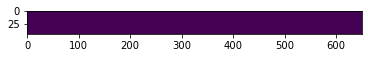

In [28]:
plt.imshow(res_final[315:360,350:1000])

In [47]:
print(d)
print(lst)

{}
[]
